In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('base_naissances_2017.xls')

data.columns=data.loc[4]
data.drop([0,1,2,3,4], inplace=True)
data.set_index('CODGEO',inplace=True)

data.head()

4,LIBGEO,REG,DEP,NAISD08,NAISD09,NAISD10,NAISD11,NAISD12,NAISD13,NAISD14,NAISD15,NAISD16,NAISD17
CODGEO,,,,,,,,,,,,,
01001,L'Abergement-Clémenciat,84,01,8,13,7,7,5,8,8,13,7,8
01002,L'Abergement-de-Varey,84,01,4,3,0,7,1,5,3,5,6,4
01004,Ambérieu-en-Bugey,84,01,224,186,211,228,218,208,238,222,220,204
01005,Ambérieux-en-Dombes,84,01,23,21,27,22,21,26,17,15,14,18
01006,Ambléon,84,01,1,1,1,4,1,1,1,2,2,1


In [3]:
for column in data.columns:
    if re.match('NAIS',column):
        data[column]=pd.to_numeric(data[column],downcast='integer')

data.dtypes

4
LIBGEO      object
REG         object
DEP         object
NAISD08    float64
NAISD09    float64
NAISD10    float64
NAISD11    float64
NAISD12    float64
NAISD13    float64
NAISD14    float64
NAISD15    float64
NAISD16      int16
NAISD17      int16
dtype: object

In [4]:
birth_by_reg_2017 = data.groupby('REG').NAISD17.agg(sum)

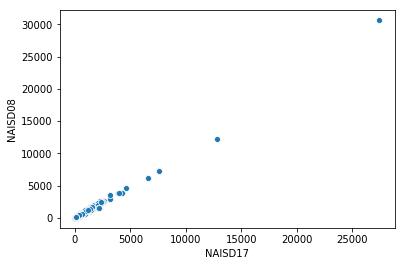

In [5]:
#one scatter plot
sns.scatterplot(x='NAISD17', y='NAISD08', data=data)

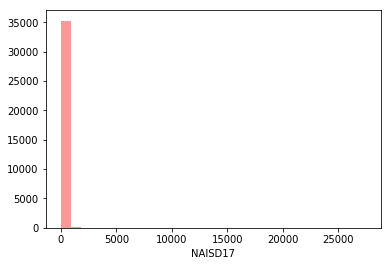

In [6]:
#one histogram
sns.distplot(data['NAISD17'],bins=30,kde=False,color='red')

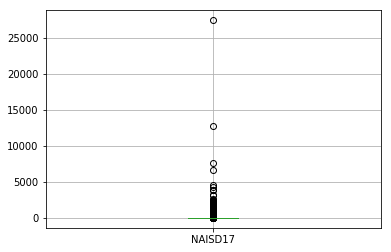

In [7]:
#one box plot 
data.boxplot(column='NAISD17')

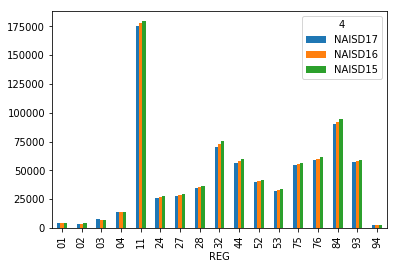

In [8]:
#one bar graph
data[['NAISD17','NAISD16','NAISD15','REG']].groupby(['REG']).agg('sum').plot.bar()

In [21]:
data[data.index=='01004']['NAISD16','NAISD17'].mean()

#sns.scatterplot(x=['NAISD16','NAISD17'], y='NAISD08', data=data[data.index=='01004'])

KeyError: ('NAISD16', 'NAISD17')